## Text Corpora Access

In [2]:
import nltk

In [5]:
# see the first 5 of Gutenberg corpus
print(nltk.corpus.gutenberg.fileids()[:5])

# get the first of Gutenberg corpus (austen-emma)
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
print(len(emma))

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt']
192427


In [8]:
from nltk.corpus import gutenberg
# showing statistics foe each text
for fileid in gutenberg.fileids()[:5]:
    # 
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)


5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt


In [11]:
# dig into .sent() method
sentences = gutenberg.sents('austen-emma.txt')
# show sentences
print(sentences)
print(sentences[10]) # type: ignore

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]
['The', 'danger', ',', 'however', ',', 'was', 'at', 'present', 'so', 'unperceived', ',', 'that', 'they', 'did', 'not', 'by', 'any', 'means', 'rank', 'as', 'misfortunes', 'with', 'her', '.']


In [12]:
# load brown corpus
from nltk.corpus import brown
# get news test
news = brown.words(categories='news')
# frequcency distribution
fdist = nltk.FreqDist([w.lower() for w in news])
# putput the number of each modal in a given text
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ': ', fdist[m])

can:  94
could:  87
may:  93
might:  38
must:  53
will:  389


In [14]:
# get conditional frequency dist

cfd = nltk.ConditionalFreqDist(
    (genre, word) 
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
# define genrus
genres = ['news', 'hobbies', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

          can could   may might  must  will 
   news    93    86    66    38    50   389 
hobbies   268    58   131    22    83   264 
  humor    16    30     8     8     9    13 


In [15]:
# inaugural address corpus
from nltk.corpus import inaugural
# check file ids
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

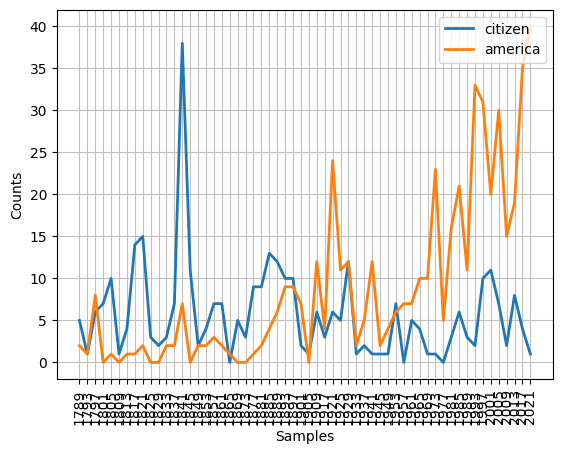

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
# Check how 'america' and 'citizen' are used over time

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)

cfd.plot()

## Conditional Frequency Distribution

In [26]:
# specify genres and each word
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)
              ]

# get conditional freq dist
cfd = nltk.ConditionalFreqDist(genre_word)
print("conditions: ", cfd.conditions())

print(cfd['news'])
print(cfd['romance'])

conditions:  ['news', 'romance']
<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>


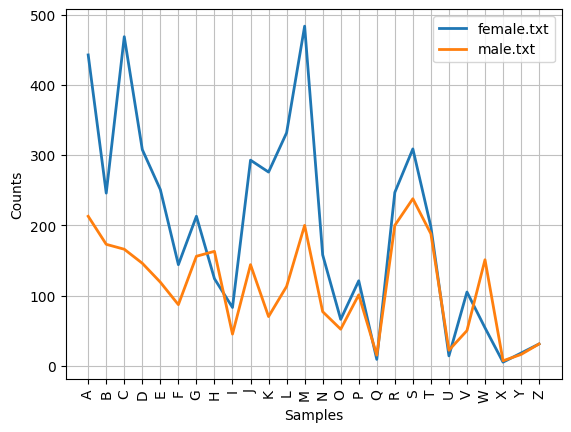

<Axes: xlabel='Samples', ylabel='Counts'>

In [53]:
# create conditional freq dist
# the frequency of initial alphabet based on each gender
names = nltk.corpus.names

name_cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)
)

# show plot
name_cfd.plot()